In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad


In [2]:
# Parameters for bean type A
mu_A = 5
sigma_A = 2

# Parameters for bean type B
mu_B = 4
sigma_B = 1.4

Normalize according the formula $p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$

Apply integer  $P_{\mu,\sigma}(x) = \int_{x_1}^{x_2} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2} dx$

In [3]:
# Define the integrand function
def form_norm(x, mu, sigma):
    exponent = np.exp(-((x - mu) ** 2 / (2 * sigma ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * exponent

# Define functions to compute the conditional probabilities
def probability_A_given_B(T):
    prob_A_given_B, _ = quad(form_norm, T, np.inf, args=(mu_A, sigma_A))
    return prob_A_given_B

def probability_B_given_A(T):
    prob_B_given_A, _ = quad(form_norm, -np.inf, T, args=(mu_B, sigma_B))
    return prob_B_given_A

Given a weight threshold T, the probability of misclassifying a bean type B as type A (Type I error) can be written as:


P(Type I error)= P(x≥T ∣ bean is type B)

$P_ = \int_{T}^{∞} FB(x) dx$


Similarly, the probability of misclassifying a bean type A as type B (Type II error) can be written as:

P(Type II error)= P(x<T ∣ bean is type A)

$P_ = \int_{-∞}^{T} FA(x) dx$


In [4]:
# Generate a range of weight thresholds T
weight = np.linspace(1, 8, 1000)

# Compute the conditional probabilities for each value of T
prob_A_given_B_values = np.array([probability_A_given_B(T) for T in weight])
prob_B_given_A_values = np.array([probability_B_given_A(T) for T in weight])



To calculate Bayes error $ = 1 - \frac{P(A | B) + P(B | A)}{2}$

In [5]:
# Calculate the Bayes error probability as the average of the conditional probabilities
bayes_error_values = 1 - (prob_A_given_B_values + prob_B_given_A_values) / 2

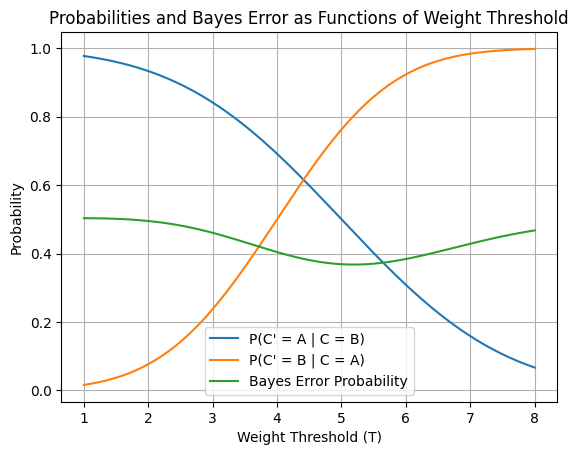

In [6]:
# Plot the probabilities and Bayes error as functions of the weight threshold T
plt.plot(weight, prob_A_given_B_values, label='P(C\' = A | C = B)')
plt.plot(weight, prob_B_given_A_values, label='P(C\' = B | C = A)')
plt.plot(weight, bayes_error_values, label='Bayes Error Probability')
plt.xlabel('Weight Threshold (T)')
plt.ylabel('Probability')
plt.title('Probabilities and Bayes Error as Functions of Weight Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Set seed for reproducibility
np.random.seed(100)

# Number of data points for each bean type
n_points = 5000

# Simulate data points for bean type A and bean type B
data_A = mu_A + sigma_A * np.random.randn(n_points)
data_B = mu_B + sigma_B * np.random.randn(n_points)

# Generate 1,000 values of T between 1 and 8
T_values = np.linspace(1, 8, 1000)


# Compute the missclassification rate for each value of T
missclassification_rate = []
for T in T_values:
    prob_A_given_B = probability_A_given_B(T)
    prob_B_given_A = probability_B_given_A(T)
    missclassification_rate.append(1 - (prob_A_given_B + prob_B_given_A) / 2)

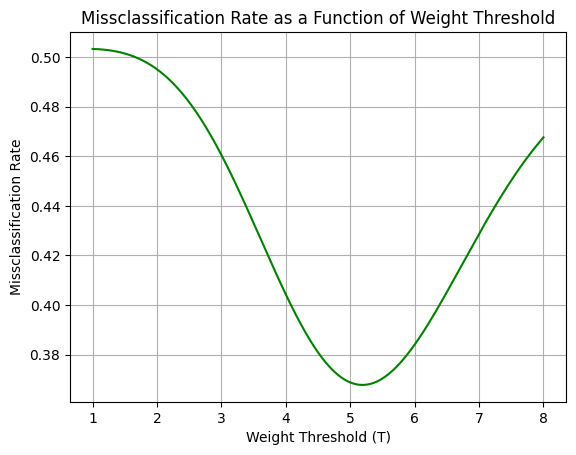

In [8]:
# Plot the missclassification rate as a function of T
plt.plot(T_values, missclassification_rate, color='green')
plt.xlabel('Weight Threshold (T)')
plt.ylabel('Missclassification Rate')
plt.title('Missclassification Rate as a Function of Weight Threshold')
plt.grid(True)
plt.show()